In [1]:
#Importing all the libraries needed

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
#Importing OS library because i am using the Dataset on my local computer

In [4]:
import os

df = os.listdir("../Documents/brain_tumor/Training")
df

['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']

In [5]:
#Giving target values to the predicted variable as machine deals with numbers

In [6]:
classes = {"no_tumor" : 0 , "pituitary_tumor" : 1 , "glioma_tumor" : 2 , "meningioma_tumor" : 3}

In [7]:
!pip install opencv-python

In [8]:
import cv2

In [9]:
#Reading Images from the Dataset

In [10]:
X = []
Y = []
for i in classes:
    df1 = "brain_tumor/Training/" + i
    for j in os.listdir(df1):
        img = cv2.imread(df1 + '/' + j , 0)
        img = cv2.resize(img,(200,200))
        X.append(img)
        Y.append(classes[i])

In [11]:
X = np.array(X)
Y = np.array(Y)

In [12]:
#Finding shape of array 

In [13]:
print(X.shape)
print(Y.shape)

(2870, 200, 200)
(2870,)


In [14]:
print(X.ndim)
print(Y.ndim)

3
1


In [15]:
#Reshape the array to 2D

In [16]:
X1= X.reshape(len(X) , -1)

In [17]:
np.unique(Y)

array([0, 1, 2, 3])

In [18]:
print(X1.ndim)
print(X1.shape)

2
(2870, 40000)


In [19]:
pd.Series(Y).value_counts()

1    827
2    826
3    822
0    395
dtype: int64

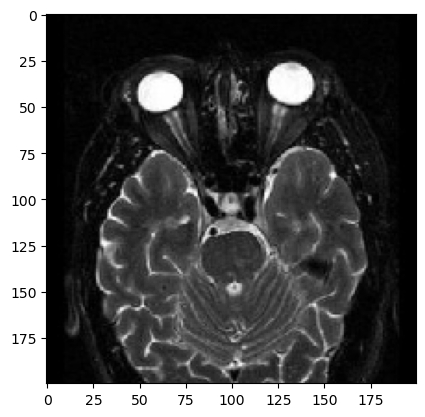

In [20]:
plt.imshow(X[1] , cmap ='gray')

In [21]:
#Splitting of Data

In [22]:
x_train , x_test , y_train , y_test = train_test_split(X1,Y,random_state=42,test_size=.25)

In [23]:
print(x_train.shape)
print(x_test.shape)

(2152, 40000)
(718, 40000)


In [24]:
print(y_test.shape)
print(y_train.shape)

(718,)
(2152,)


In [25]:
print(x_train.max())
print(x_train.min())

255
0


In [26]:
print(x_test.max())
print(x_test.min())

255
0


In [27]:
x_train = x_train / 255
x_test = x_test /  255

In [28]:
#Coverting Values between 0 and 1

In [29]:
print(x_train.max() , x_train.min())
print(x_test.max() , x_test.min())

1.0 0.0
1.0 0.0


In [30]:
#Method 1 Linear Suppor Vector Machine

In [31]:
from sklearn.svm import SVC

In [32]:
model1 = SVC()
model1.fit(x_train,y_train)

SVC()

In [33]:
# Function to plot the confusion matrix (code from https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html)
from sklearn import metrics
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


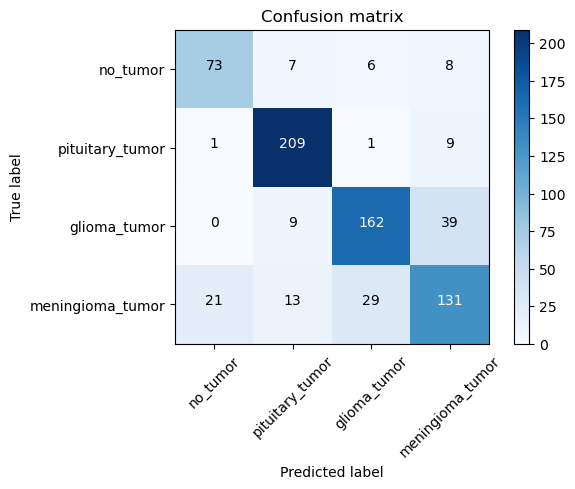

In [34]:
y_pred1 = model1.predict(x_test)

cm = metrics.confusion_matrix(y_test, y_pred1)
plot_confusion_matrix(cm, classes=['no_tumor', 'pituitary_tumor' , 'glioma_tumor', 'meningioma_tumor'])

In [35]:
print("accuracy: {}%".format(round(accuracy_score(y_test, y_pred1)*100,2)))

accuracy: 80.08%


In [36]:
#Method 2 Naive Bayes

In [37]:
from sklearn.naive_bayes import MultinomialNB

model2 = MultinomialNB()
model2.fit(x_train,y_train)

MultinomialNB()

Confusion matrix, without normalization


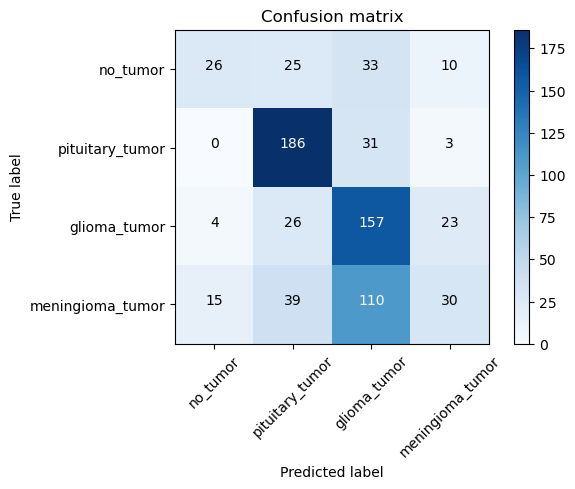

In [38]:
y_pred2 = model2.predict(x_test)

cm = metrics.confusion_matrix(y_test, y_pred2)
plot_confusion_matrix(cm, classes=['no_tumor', 'pituitary_tumor' , 'glioma_tumor', 'meningioma_tumor'])

In [39]:
print("accuracy: {}%".format(round(accuracy_score(y_test, y_pred2)*100,2)))

accuracy: 55.57%


In [40]:
#Method 3 Linear Regression

In [41]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression

model3 = LogisticRegression(C=0.1)
model3.fit(x_train,y_train)

LogisticRegression(C=0.1)

Confusion matrix, without normalization


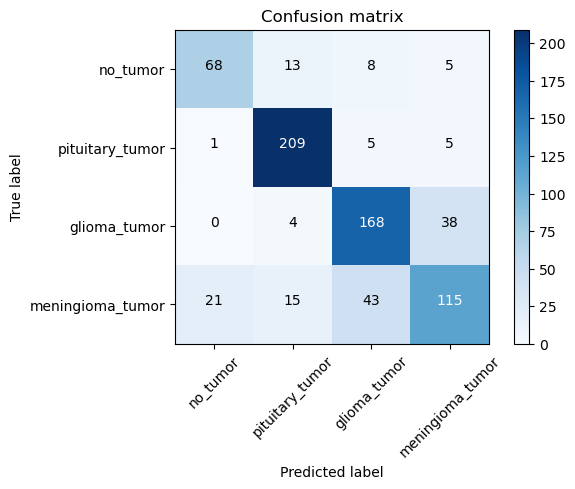

In [42]:
y_pred3 = model3.predict(x_test)

cm = metrics.confusion_matrix(y_test, y_pred3)
plot_confusion_matrix(cm, classes=['no_tumor', 'pituitary_tumor' , 'glioma_tumor', 'meningioma_tumor'])

In [43]:
print("accuracy: {}%".format(round(accuracy_score(y_test, y_pred3)*100,2)))

accuracy: 77.99%


In [44]:
#Methods    ---    Accuracy
#SVM    ---         80.08
#NB    ---          55.57
#LR    ---          77.99

In [45]:
#Highest accuracy is obtained by the Linear SVM so this algorithm is most effective to classify brain_tumor

In [46]:
#Classification Report by using Linear SVM Classifier

In [47]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.77      0.78      0.77        94
           1       0.88      0.95      0.91       220
           2       0.82      0.77      0.79       210
           3       0.70      0.68      0.69       194

    accuracy                           0.80       718
   macro avg       0.79      0.79      0.79       718
weighted avg       0.80      0.80      0.80       718



In [48]:
#Prediction

In [49]:
y_pred1

array([1, 1, 1, 1, 3, 3, 3, 2, 1, 0, 2, 1, 2, 1, 3, 0, 2, 0, 2, 3, 1, 2,
       3, 0, 3, 1, 3, 2, 3, 1, 2, 2, 2, 0, 3, 1, 0, 2, 3, 2, 1, 3, 3, 3,
       2, 3, 3, 2, 1, 3, 1, 3, 2, 1, 1, 3, 1, 2, 2, 2, 3, 1, 0, 0, 1, 2,
       1, 0, 1, 1, 1, 3, 0, 1, 1, 1, 1, 3, 1, 1, 2, 1, 2, 2, 3, 1, 3, 3,
       1, 3, 2, 2, 3, 0, 0, 1, 0, 2, 3, 2, 3, 1, 3, 2, 2, 1, 3, 1, 3, 1,
       1, 1, 2, 3, 1, 3, 3, 1, 2, 1, 1, 2, 2, 3, 1, 2, 2, 1, 1, 1, 1, 1,
       2, 2, 3, 3, 2, 3, 1, 1, 2, 1, 3, 1, 2, 3, 2, 0, 2, 2, 2, 3, 2, 3,
       2, 2, 1, 2, 2, 0, 1, 0, 1, 2, 3, 1, 1, 2, 1, 3, 2, 3, 3, 3, 2, 1,
       0, 1, 3, 1, 2, 1, 3, 2, 0, 0, 3, 1, 3, 2, 2, 1, 2, 1, 1, 1, 0, 2,
       2, 1, 3, 2, 3, 3, 1, 1, 1, 1, 1, 3, 2, 0, 2, 2, 1, 2, 1, 2, 3, 1,
       1, 1, 1, 1, 1, 3, 0, 1, 1, 1, 0, 1, 1, 3, 1, 0, 3, 2, 2, 1, 2, 3,
       0, 1, 1, 1, 1, 3, 2, 3, 1, 1, 3, 2, 1, 0, 2, 2, 3, 3, 3, 2, 3, 3,
       2, 1, 1, 1, 0, 1, 2, 1, 0, 0, 1, 1, 3, 2, 1, 2, 0, 3, 3, 1, 2, 3,
       2, 2, 1, 2, 2, 1, 3, 1, 2, 0, 2, 1, 3, 3, 2,

In [50]:
clss = {0:'No_Tumor' , 1: 'Pituitary_Tumor' , 2 : 'Glioma_tumor' , 3 : 'Meningioma_tumor'}

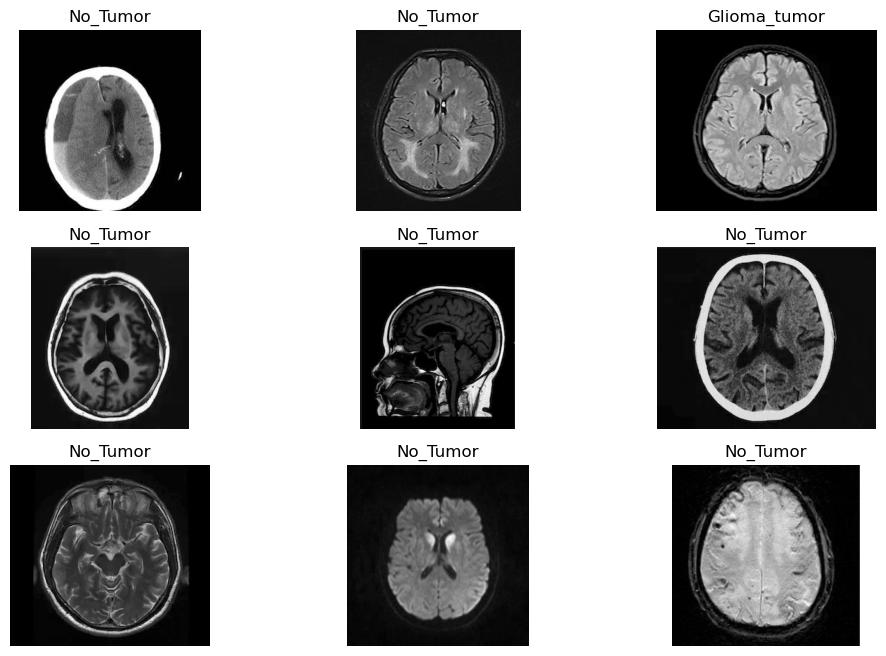

In [51]:
plt.figure(figsize=(12,8))
p = os.listdir("../Documents/brain_tumor/Testing")
c= 1

for i in os.listdir("brain_tumor/Testing/no_tumor/")[:9]:
    plt.subplot(3,3,c)
    
    img = cv2.imread("brain_tumor/Testing/no_tumor/"+i,0)
    img1 = cv2.resize(img,(200,200))
    img1 = img1.reshape(1,-1)/255
    p = model1.predict(img1)
    plt.title(clss[p[0]])
    plt.imshow(img,cmap='gray')
    plt.axis('off')
    c+=1

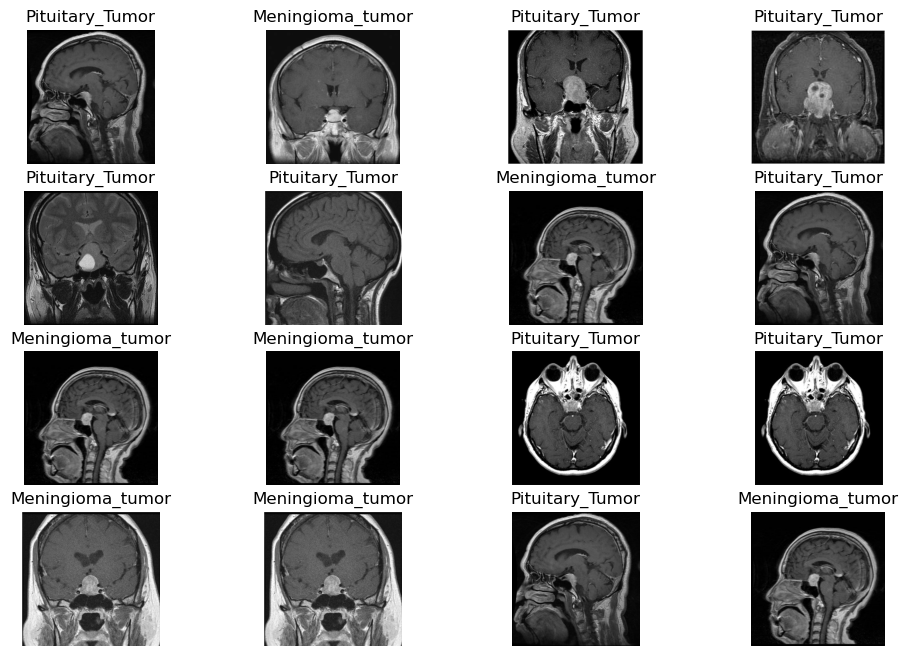

In [52]:
plt.figure(figsize=(12,8))
p = os.listdir("../Documents/brain_tumor/Testing")
c= 1

for i in os.listdir("brain_tumor/Testing/pituitary_tumor/")[:16]:
    plt.subplot(4,4,c)
    
    img = cv2.imread("brain_tumor/Testing/pituitary_tumor/"+i,0)
    img1 = cv2.resize(img,(200,200))
    img1 = img1.reshape(1,-1)/255
    p = model1.predict(img1)
    plt.title(clss[p[0]])
    plt.imshow(img,cmap='gray')
    plt.axis('off')
    c+=1

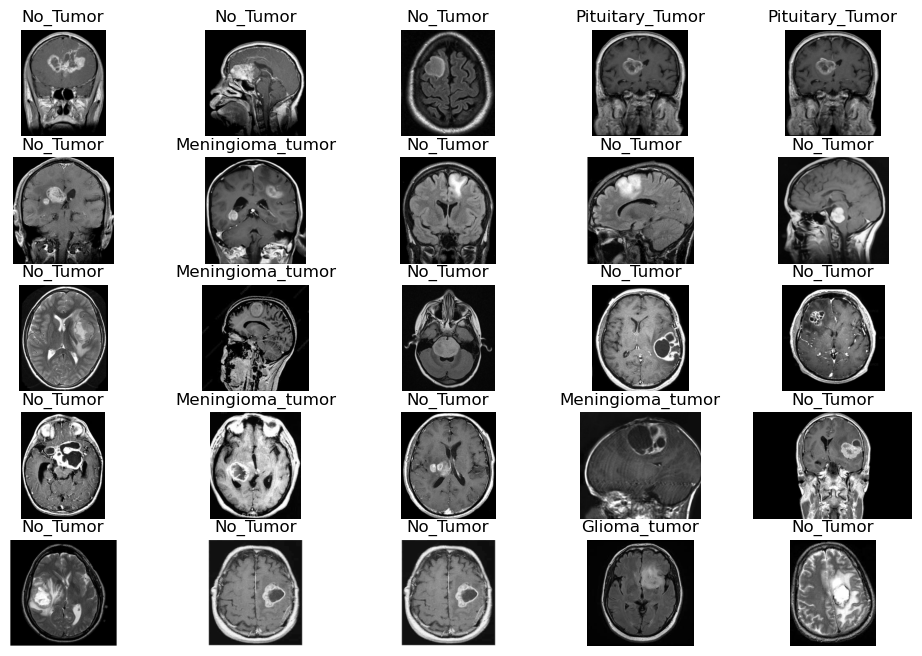

In [53]:
plt.figure(figsize=(12,8))
p = os.listdir("../Documents/brain_tumor/Testing")
c= 1

for i in os.listdir("brain_tumor/Testing/glioma_tumor/")[:25]:
    plt.subplot(5,5,c)
    
    img = cv2.imread("brain_tumor/Testing/glioma_tumor/"+i,0)
    img1 = cv2.resize(img,(200,200))
    img1 = img1.reshape(1,-1)/255
    p = model1.predict(img1)
    plt.title(clss[p[0]])
    plt.imshow(img,cmap='gray')
    plt.axis('off')
    c+=1

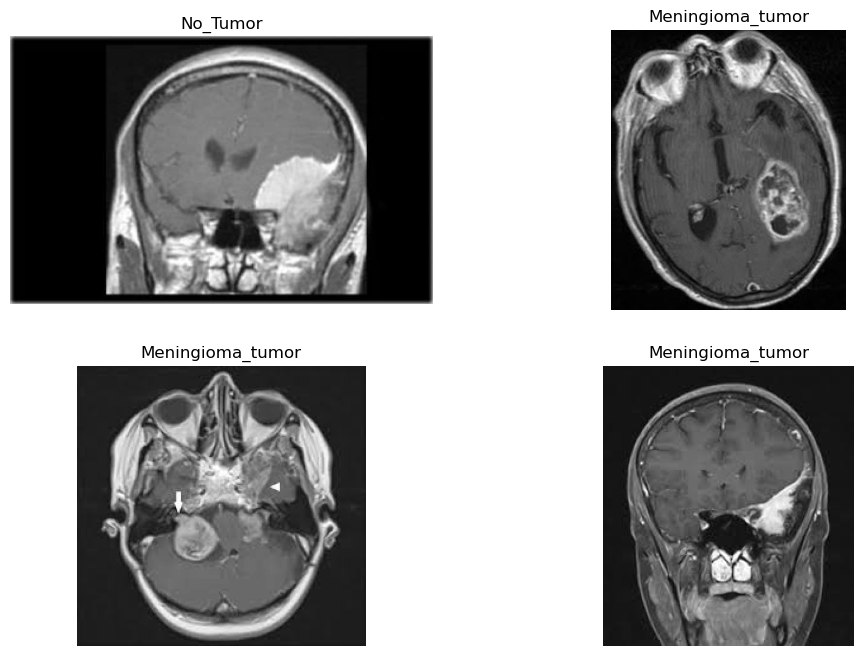

In [54]:
plt.figure(figsize=(12,8))
p = os.listdir("../Documents/brain_tumor/Testing")
c= 1

for i in os.listdir("brain_tumor/Testing/meningioma_tumor/")[:4]:
    plt.subplot(2,2,c)
    
    img = cv2.imread("brain_tumor/Testing/meningioma_tumor/"+i,0)
    img1 = cv2.resize(img,(200,200))
    img1 = img1.reshape(1,-1)/255
    p = model1.predict(img1)
    plt.title(clss[p[0]])
    plt.imshow(img,cmap='gray')
    plt.axis('off')
    c+=1